<a href="https://colab.research.google.com/github/Manwi23/Hello-Darkness/blob/main/Kopia_notatnika_NNproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==1.14
!pip install rawpy
!pip install scipy==1.2.0

     |████████████████████████████████| 109.3MB 89kB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 491kB 41.3MB/s 
     |████████████████████████████████| 3.2MB 42.7MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 1.7MB 6.8MB/s 
     |████████████████████████████████| 26.6MB 132kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
import tensorflow.contrib

import matplotlib.pyplot as plt
import rawpy
import os

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
!git clone https://github.com/cchen156/Learning-to-See-in-the-Dark.git

Cloning into 'Learning-to-See-in-the-Dark'...
remote: Enumerating objects: 171, done.
remote: Total 171 (delta 0), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (171/171), 471.42 KiB | 2.53 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [ ]:
%cd Learning-to-See-in-the-Dark/
!python download_models.py

/content/Learning-to-See-in-the-Dark
Dowloading Sony Model (84Mb)
Dowloading Fuji Model (84Mb)


In [ ]:
!cd dataset && wget https://storage.googleapis.com/isl-datasets/SID/Sony.zip

--2021-05-17 19:47:27--  https://storage.googleapis.com/isl-datasets/SID/Sony.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26926662016 (25G) [application/zip]
Saving to: ‘Sony.zip’

Sony.zip            100%[===================>]  25.08G  59.3MB/s    in 7m 7s   

2021-05-17 19:54:35 (60.1 MB/s) - ‘Sony.zip’ saved [26926662016/26926662016]



In [ ]:
# %cd Learning-to-See-in-the-Dark/
# !python test_Sony.py 

In [ ]:
!cd Learning-to-See-in-the-Dark && ls

/bin/bash: line 0: cd: Learning-to-See-in-the-Dark: No such file or directory


In [ ]:
!ls

checkpoint	     download_models.py  README.md     train_Fuji.py
dataset		     images		 test_Fuji.py  train_Sony.py
download_dataset.py  LICENSE.md		 test_Sony.py


In [ ]:
!cd result_Sony && cd final && ls

/bin/bash: line 0: cd: result_Sony: No such file or directory


In [ ]:
!cd dataset && unzip -l Sony.zip >> conts

In [ ]:
def unzip_only(n, testset_only=True):
    cmd = "cd dataset && unzip -l Sony.zip"
    out = os.popen(cmd).read()
    cmd = "cd dataset && cat Sony_test_list.txt"
    l = os.popen(cmd).read()

    in_testset_long = []
    in_testset_short = []

    for line in l.split('\n'):
        sp = line.split(' ')
        if len(sp) > 1:
            lo = sp[1].split('/')[3]
            sh = sp[0].split('/')[3]
            in_testset_long += [lo]
            in_testset_short += [sh]

    needed = []
    cnt = 0

    cmd = "cd dataset && mkdir Sony"
    os.system(cmd)

    cmd = "cd dataset/Sony && mkdir short"
    os.system(cmd)

    cmd = "cd dataset/Sony && mkdir long"
    os.system(cmd)

    eee = 0

    # print(in_testset_long)

    for line in out.split('\n'):
        # print("ok", len(needed), cnt)
        sp = line.split('/')
        if len(sp) > 1:
            ph = sp[-1]
            doing = True
            if ph and (ph in needed or cnt < n):
                if ph[0] == '1':
                    print(ph, ph in needed, ph in in_testset_short, ph in in_testset_long, line)
                if ph not in needed:
                    cnt += 1
                    if 'short' in line:
                        ind = in_testset_short.index(ph) if ph in in_testset_short else None
                        if ind is None:
                            cnt -= 1
                            doing = False
                        else:
                            needed += [in_testset_long[ind]]
                    else:
                        ind = in_testset_long.index(ph) if ph in in_testset_long else None
                        if ind is None:
                            cnt -= 1
                            doing = False
                        else:
                            needed += [in_testset_short[ind]]
                else:
                    needed.remove(ph)
                if doing:
                    path = ''
                    if 'short' in line:
                        path = 'Sony/short/' + ph
                    else:
                        path = 'Sony/long/' + ph
                    cmd = "cd dataset && unzip -p Sony.zip " + path + " > " + path
                    os.system(cmd)
            elif cnt >= n and len(needed) < 1:
                break

In [ ]:
unzip_only(5)

10003_00_10s.ARW False False True  25690112  2017-11-05 20:07   Sony/long/10003_00_10s.ARW
10006_00_10s.ARW False False True  25198592  2017-11-05 20:23   Sony/long/10006_00_10s.ARW
10011_00_10s.ARW False False True  24969216  2017-11-05 20:54   Sony/long/10011_00_10s.ARW
10016_00_10s.ARW False False True  25427968  2017-11-05 21:17   Sony/long/10016_00_10s.ARW
10022_00_10s.ARW False False True  25362432  2017-11-05 22:30   Sony/long/10022_00_10s.ARW
10003_00_0.04s.ARW True True False  24641536  2017-11-05 20:09   Sony/short/10003_00_0.04s.ARW
10006_00_0.04s.ARW True True False  24641536  2017-11-05 20:24   Sony/short/10006_00_0.04s.ARW
10011_00_0.04s.ARW True True False  24608768  2017-11-05 20:55   Sony/short/10011_00_0.04s.ARW
10016_00_0.04s.ARW True True False  24641536  2017-11-05 21:18   Sony/short/10016_00_0.04s.ARW
10022_00_0.04s.ARW True True False  24641536  2017-11-05 22:32   Sony/short/10022_00_0.04s.ARW


In [ ]:
# %cd Learning-to-See-in-the-Dark

/content/Learning-to-See-in-the-Dark


In [ ]:
!cd dataset && cd Sony && cd long && ls

10003_00_10s.ARW  10011_00_10s.ARW  10022_00_10s.ARW
10006_00_10s.ARW  10016_00_10s.ARW


In [ ]:
!cd dataset && cd Sony && cd short && ls

10003_00_0.04s.ARW  10011_00_0.04s.ARW	10022_00_0.04s.ARW
10006_00_0.04s.ARW  10016_00_0.04s.ARW


In [ ]:
# !cd dataset && cd Sony && rm -r long

In [ ]:
!python test_Sony.py 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
def plot_k_model_outputs(k=3, fig_x=20, fig_y=10):
    img_list = os.listdir("result_Sony/final")
    img_list.sort()
    model_path = "result_Sony/final/"
    short_img = 'dataset/Sony/short/'
    fig, axes = plt.subplots(nrows=k, ncols=4, figsize=(fig_x, fig_y))
    [axi.set_axis_off() for axi in axes.ravel()]
    axes[0][0].title.set_text('Short exposure')
    axes[0][1].title.set_text('Long exposure')
    axes[0][2].title.set_text('Model output')
    axes[0][3].title.set_text('Scaled output')
    for i in range(k):
        name = img_list[i*3][:-10]
        gt_raw = rawpy.imread(short_img+name+'0.04s.ARW')
        im = gt_raw.postprocess()
        axes[i][0].imshow(im)
        img = plt.imread(model_path+img_list[i*3])
        axes[i][1].imshow(img)
        img = plt.imread(model_path+img_list[i*3+1])
        axes[i][2].imshow(img)
        img = plt.imread(model_path+img_list[i*3+2])
        axes[i][3].imshow(img)

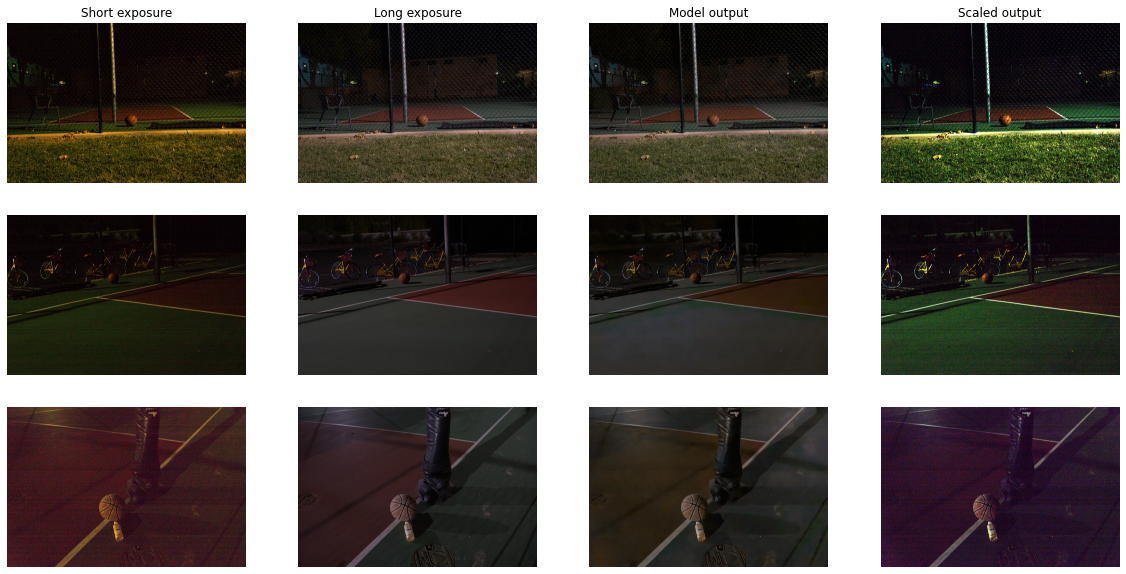

In [ ]:
plot_k_model_outputs(k=3)